Code for scraping Harham.com

In [4]:
import requests, bs4, time
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import date
import os
import re
import matplotlib.pyplot as plt
import scraping_funcs_harnham as sf
import cleaning_funcs_harnham as cf

In [3]:
#urls for US data science jobs
links=[]
for i in range(1,4):
    url="https://www.harnham.com/jobs?options=1111,1090&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)

print("done 1")
#urls for US marketing/insight jobs
for i in range(1,8):
    url="https://www.harnham.com/jobs?options=973,1090&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)

print("done 2")
#urls digital analytics
for i in range(1,5):
    url="https://www.harnham.com/jobs?options=1035,1090&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)
        
print("done 3")
#urls for data and technology jobs
for i in range(1,7):
    url="https://www.harnham.com/jobs?options=972,1090&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)



len(links)

done 1
done 2
done 3


542

In [4]:
# scrape all child pages    
info=pd.DataFrame(columns=("job_ref","job_title","location","salary","description","type"))
for urls in links:
        time.sleep(1) #ensuring at least 1 second between page grabs
        url="https://www.harnham.com"+urls
        req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage=urlopen(req).read()
        page_soup = soup(webpage, "html.parser")
        df=pd.DataFrame()
        df['job_ref']=[sf.extract_jobref(page_soup)]
        df['job_title']=[sf.extract_job_title(page_soup)]
        df['location']=[sf.extract_location(page_soup)]
        df['salary']=[sf.extract_salary(page_soup)]
        df['description']=[sf.extract_description(page_soup)]
        df['type']=[sf.extract_type(page_soup)]
        info=info.append(df,ignore_index=True)


In [5]:
import os
os.getcwd()

'C:\\Users\\lundr\\DataScienceJobs\\notebooks'

In [6]:
info.head()

,job_ref,job_title,location,salary,description,type
0,[13291 ES],Senior Data Scientist,[New York],US$155000 - US$170000 per year,"[' ', 'Senior Data Scientist', 'New York, NY',...",Permanent
1,[28244 ES2],THE COMPANY,"[Boston, Massachusetts]",US$120000 - US$140000 per year,"['Geospatial Data Scientist', 'Boston, MA ', '...",Permanent
2,[74545],Fraud Data Scientist,"[Boston, Massachusetts]",US$180000 - US$200000 per year,"['Fraud Data Scientist ', 'Boston, MA', '$200,...",Permanent
3,[46771],Senior Data Scientist San Francisco Bay Area $...,"[Santa Clara, California]",US$140000 - US$180000 per year,['Senior Data Scientist San Francisco Bay Area...,Permanent
4,[84675/KC],PRINCIPAL DATA SCIENTIST,"[San Francisco, California]",US$170000 - US$200000 per year + competitive b...,"['PRINCIPAL DATA SCIENTIST', 'San Francisco, C...",Permanent


In [2]:
import pickle
#info['url']=links

#info.to_pickle("C:/Users/lundr/DataScienceJobs/data/USA11novRaw.pkl")
info = pd.read_pickle("C:/Users/lundr/DataScienceJobs/data/USA11novRaw.pkl")

In [8]:
info.head(10)

,job_ref,job_title,location,salary,description,type,url
0,[13291 ES],Senior Data Scientist,[New York],US$155000 - US$170000 per year,"[' ', 'Senior Data Scientist', 'New York, NY',...",Permanent,/job/senior-data-scientist-in-new-york-jid-22057
1,[28244 ES2],THE COMPANY,"[Boston, Massachusetts]",US$120000 - US$140000 per year,"['Geospatial Data Scientist', 'Boston, MA ', '...",Permanent,/job/geospatial-data-scientist-in-boston-massa...
2,[74545],Fraud Data Scientist,"[Boston, Massachusetts]",US$180000 - US$200000 per year,"['Fraud Data Scientist ', 'Boston, MA', '$200,...",Permanent,/job/fraud-data-scientist-in-boston-massachuse...
3,[46771],Senior Data Scientist San Francisco Bay Area $...,"[Santa Clara, California]",US$140000 - US$180000 per year,['Senior Data Scientist San Francisco Bay Area...,Permanent,/job/senior-data-scientist-in-santa-clara-cali...
4,[84675/KC],PRINCIPAL DATA SCIENTIST,"[San Francisco, California]",US$170000 - US$200000 per year + competitive b...,"['PRINCIPAL DATA SCIENTIST', 'San Francisco, C...",Permanent,/job/principal-data-scientist-in-san-francisco...
5,[60678 VACTJ],Senior Data Scientist,[New York],US$140000 - US$160000 per year + Bonus,"['Senior Data ScientistNew York, New York$140,...",Permanent,/job/senior-data-scientist-in-new-york-jid-19937
6,[297457],Data Scientist,"[Boston, Massachusetts]",US$120000 - US$140000 per year,"['Data Scientist', 'Boston, MA', 'USD $140,000...",Permanent,/job/cyber-security-data-scientist-in-boston-m...
7,[362362],TV Data Scientist,"[Boston, Massachusetts]",US$150000 - US$170000 per year,"['TV Data Scientist', 'Boston, MA', 'USD $1700...",Permanent,/job/lead-data-scientist-in-boston-massachuset...
8,[DI 60778],Lead Data Scientist,"[Boston, Massachusetts]",US$140000 - US$155000 per year,"['Lead Data Scientist ', 'Boston Massachusetts...",Permanent,/job/lead-data-scientist-in-boston-massachuset...
9,[KMG - SR01],Senior Data ScientistSan Francisco Bay Area$16...,"[San Francisco, California]",US$160000 - US$185000 per year,['Senior Data ScientistSan Francisco Bay Area$...,Permanent,/job/senior-data-scientist-in-san-francisco-ca...


In [6]:
# run data cleaning functions
info['description']=cf.remove_duped_info(info['description'],[info['job_title'],info['location']])
info['description']=cf.clean_column(info['description'])
info['location']=cf.clean_column(info['location'])

info['salary_low'],info['salary_high']=cf.create_split_salary_range(info['salary'])
info['salary_low']=cf.clean_salary(info['salary_low'],'$')
info['salary_high']=cf.clean_salary(info['salary_high'],'$')

info['salary_low']=pd.to_numeric(info['salary_low'])

In [7]:
info.columns
#info['salary_average'] = (info['salary_low']+info['salary_high'])/2

Index(['job_ref', 'job_title', 'location', 'salary', 'description', 'type',
       'url', 'salary_low', 'salary_high'],
      dtype='object')

In [8]:
#add correct column headings and new columns

import numpy as np
import datetime

info.columns = ['ref_code', 'job_title', 'location', 'salary', 'description', 'jobtype','url',
       'salary_low', 'salary_high']

#company: Company or recruiter advertising the job
info['company'] = 'Harnham'

#industry: which industry sector
    
info['industry'] = np.nan

#education: required level and subject of education

info['education'] = np.nan

#**career: **
info['career'] = np.nan

#duration: How long the job had been advertised for at time of scraping
info['duration'] = np.nan

#url infom was scraped from
#info['url'] = links
#info['url'] = np.nan
#extraction date




info['extraction_date'] = date.today()

In [18]:
info.shape[0]

542

In [17]:
#pickle the cleaned data
info.to_pickle("C:/Users/lundr/DataScienceJobs/data/USA5novClean.pkl")

In [13]:


info['salary_low'][308] = 110000
info['salary_low'][399] = 220000
info['salary_low'][403] = 90000
info['salary_high'][403] = 100000
info['salary_high'][405] = 190000
info['salary_low'][427] = 150000
info['salary_low'][472] = 140000
info['salary_low'][477] = 121920
info['salary_low'][539] = 243850

# check for salary anomalies and manually correct
info[info['salary_high']/info['salary_low']>3]


C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide

,ref_code,job_title,location,salary,description,jobtype,url,salary_low,salary_high,company,industry,education,career,duration,extraction_date
405,[67395],SENIOR DATA ENGINEER,San Francisco California,US$19000 - US$195000 per year + Bonus,north san francisco - ...,Permanent,/job/senior-data-engineer-in-san-francisco-cal...,19000,190000,Harnham,NaN,NaN,NaN,NaN,2019-11-05


In [14]:
# create salary average
info['salary_average'] = (info['salary_low'][info['salary_low']>2000]+info['salary_high'][info['salary_low']>2000])/2

Plot data

In [39]:
info['jobtype']

0       Permanent
1       Permanent
2       Permanent
3       Permanent
4       Permanent
          ...    
1165     Contract
1166    Permanent
1167    Permanent
1168    Permanent
1169     Contract
Name: jobtype, Length: 1170, dtype: object

C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 26.,  63., 108., 101., 112.,  55.,  23.,  13.,   7.,   5.]),
 array([ 52500.,  79000., 105500., 132000., 158500., 185000., 211500.,
        238000., 264500., 291000., 317500.]),
 <a list of 10 Patch objects>)

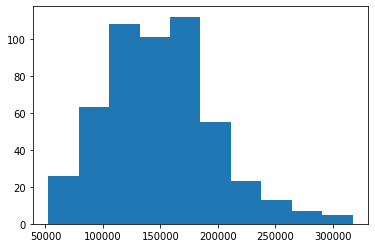

In [15]:
#plt.hist(info['salary_average'][info['jobtype']!='Contract'])
plt.hist(info['salary_average'])

In [16]:
info[info['salary_low']>2000].groupby(by='location').agg({'salary_average' : ['count','mean','median','min','max']})

salary_average                 \
                                                count           mean   
location                                                               
  Arlington  Texas                                  1   65000.000000   
  Boston  Massachusetts                           126  143568.654762   
  Boston  Ohio                                      1  192031.500000   
  Bronx  New York                                   1   67500.000000   
  Cambridge  Massachusetts                          1  135000.000000   
  Chicago  Illinois                                13  181495.230769   
  Dallas  Texas                                     4  195761.750000   
  District Heights  Maryland                        2  102500.000000   
  District of Columbia                              2  100000.000000   
  Durham  North Carolina                            1  210000.000000   
  Florida                                           1  117500.000000   
  Hicksville  New York                              1  285000.000000   
  Jersey City  New Jersey                           1  125000.000000   
  Long Island  New York                             1  312500.000000   
  Los Angeles  California                          34  123707.117647   
  Los Angeles Metro Area  California                2  162500.000000   
  Manhattan  New York                               1  128018.500000   
  Massachusetts                                     2  130000.000000   
  Milwaukee  Wisconsin                              1  110000.000000   
  Minneapolis  Minnesota                            6  212014.166667   
  Minnesota                                         1  210000.000000   
  Mountain View  California                         1  231657.500000   
  New Jersey                                        1  150000.000000   
  New York                                        164  146683.478659   
  Novato  California                                1  170000.000000   
  Oakland  California                               1  155000.000000   
  Portland  Oregon                                 11  125227.272727   
  Raleigh  North Carolina                           1  120000.000000   
  Rochester  New York                               5  167000.000000   
  San Francisco  California                        95  171128.973684   
  San Jose  California                              4  177500.000000   
  San Mateo  California                             1  150000.000000   
  Santa Clara  California                           1  160000.000000   
  Santa Monica  California                          2  117500.000000   
  Seattle  Washington                               4  162500.000000   
  South San Francisco  California                   1  220000.000000   
  Sunnyvale  California                             1  190000.000000   
  Tampa  Florida                                    2   86250.000000   
  Texas City  Texas                                 1   65000.000000   
  Toronto  Ontario                                  2   94592.000000   
  Vancouver  Washington                             1   67500.000000   
  Waltham  Massachusetts                            3  162860.666667   
  Washington  District of Columbia                  2  132500.000000   
  White Plains  New York                            5   66500.000000   

                                                                       
                                           median       min       max  
location                                                               
  Arlington  Texas                       65000.00   65000.0   65000.0  
  Boston  Massachusetts                 145000.00   80000.0  225000.0  
  Boston  Ohio                          192031.50  192031.5  192031.5  
  Bronx  New York                        67500.00   67500.0   67500.0  
  Cambridge  Massachusetts              135000.00  135000.0  135000.0  
  Chicago  Illinois                     182887.50   80000.0  240000.0  
  Dall